# BAX453 - Individual Assignment 2 - Part A
##Association Rule Mining - Part A

Submitted by Swati Vaishampayan

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #visualisation
from datetime import datetime as dt #timestamp to date conversion
from mlxtend.preprocessing import TransactionEncoder           # fre
from mlxtend.frequent_patterns import apriori                  #frequent itemset generation
from mlxtend.frequent_patterns import association_rules


In [59]:
txns = pd.read_excel("/content/drive/My Drive/Data for Colab/transactions_by_dept.xlsx")
# Data checks
txns.head(5)
txns.dtypes    #2064 tranactions
txns.isnull().sum() # no null values
txns[txns.duplicated()] #no duplicates
len(txns.Dept.unique()) #unique 160 items
txns.head(7)

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1
5,16120100160021008773,0983:WINE,177,4
6,16120100160021008773,0991:TOBACCO,179,2


No of transactions - 2064, 
No. of unique Items - 160, 
No. unique itemsets - 1009


In [60]:
#converting transactional data to list format
itemlist = txns.groupby("POS Txn")["Dept"].apply(lambda x: x.values.tolist()).reset_index()["Dept"].values.tolist()
itemlist[1:7]

[['0597:HEALTH AIDS', '0604:PERSONAL CARE'],
 ['0819:PRE-RECORDED A/V', '0826:SMALL ELECTRICS', '0982:SPIRITS'],
 ['0961:GENERAL GROCERIES'],
 ['0982:SPIRITS'],
 ['0982:SPIRITS', '0991:TOBACCO'],
 ['0879:PET SUPPLIES', '0982:SPIRITS', '0983:WINE', '0984:BEER']]

In [0]:
#list to df creation
te = TransactionEncoder()
te_ary = te.fit(itemlist).transform(itemlist)
df = pd.DataFrame(te_ary, columns=te.columns_)

## Frequent Itemsets and Association Rules generation - Part A (a)

### First we generate a list of frequent itemsets. We need to set a minimum threshold for support , which indicates how frequently the item set occurs in data

In [75]:
#generating frequent itemsets with 2% support
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by = ['support'], ascending= False)

,support,itemsets
20,0.152132,(0982:SPIRITS)
19,0.133236,(0973:CANDY)
18,0.122578,(0962:BEVERAGES)
7,0.096899,(0597:HEALTH AIDS)
21,0.093023,(0983:WINE)
23,0.089632,(0991:TOBACCO)
13,0.076550,(0836:HOUSEHOLD CLEANING)
9,0.073643,(0604:PERSONAL CARE)
22,0.064438,(0984:BEER)
8,0.064438,(0603:BEAUTY CARE)


In [77]:
##generating frequent itemsets with 3% support
frequent_itemsets2 = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets2.sort_values(by = ["support"], ascending = False)

,support,itemsets
12,0.152132,(0982:SPIRITS)
11,0.133236,(0973:CANDY)
10,0.122578,(0962:BEVERAGES)
2,0.096899,(0597:HEALTH AIDS)
13,0.093023,(0983:WINE)
15,0.089632,(0991:TOBACCO)
7,0.076550,(0836:HOUSEHOLD CLEANING)
4,0.073643,(0604:PERSONAL CARE)
3,0.064438,(0603:BEAUTY CARE)
14,0.064438,(0984:BEER)


Key thing to note is - for this dataset the support value is very less ( 0.02 - 0.03) to get few combinations for frequent itemsets.

With 0.03, 9 combinations 

With 0.02, 3 combinations 

Itemset Wine and Spirits has the highest support value. Other goo combinations are:
Candy and Beverages
Health Aid and Personal Care
Health Aid and Household cleanings

### Association Rules - Part A (a)

We generate association rules where we set a minimum confidence level. 
Confidence is the ratio of combinations of consequent as well as the antecedent over all occurances of antecdant. 

In [79]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by = ["lift","confidence","support"], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.073643,0.096899,0.031008,0.421053,4.345263,0.023872,1.559901
2,(0597:HEALTH AIDS),(0604:PERSONAL CARE),0.096899,0.073643,0.031008,0.320000,4.345263,0.023872,1.362289
4,(0597:HEALTH AIDS),(0836:HOUSEHOLD CLEANING),0.096899,0.076550,0.029554,0.305000,3.984304,0.022137,1.328704
5,(0836:HOUSEHOLD CLEANING),(0597:HEALTH AIDS),0.076550,0.096899,0.029554,0.386076,3.984304,0.022137,1.471030
7,(0961:GENERAL GROCERIES),(0962:BEVERAGES),0.047965,0.122578,0.020833,0.434343,3.543418,0.014954,1.551158
0,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.064438,0.096899,0.020349,0.315789,3.258947,0.014105,1.319917
1,(0597:HEALTH AIDS),(0603:BEAUTY CARE),0.096899,0.064438,0.020349,0.210000,3.258947,0.014105,1.184256
11,(0982:SPIRITS),(0983:WINE),0.152132,0.093023,0.037306,0.245223,2.636146,0.023154,1.201649
10,(0983:WINE),(0982:SPIRITS),0.093023,0.152132,0.037306,0.401042,2.636146,0.023154,1.415571
12,(0984:BEER),(0982:SPIRITS),0.064438,0.152132,0.024225,0.375940,2.471146,0.014422,1.358632


Visualizing the metrics support , confidence and lift

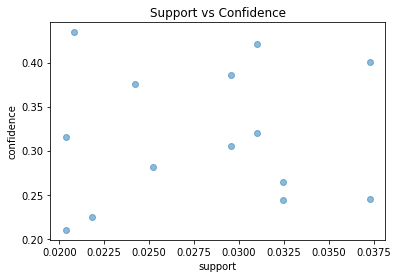

In [80]:
#support versus confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

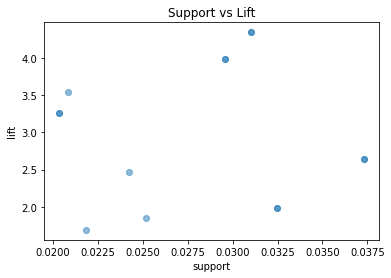

In [82]:
# Support versus Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

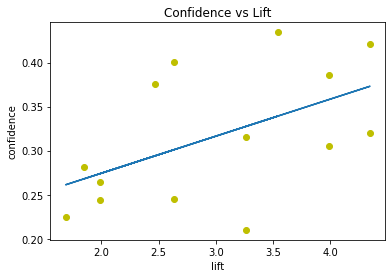

In [86]:
# confidence versus lift
fit = np.polyfit(rules["lift"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules["lift"], rules["confidence"], "yo", rules["lift"], 
fit_fn(rules["lift"]))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Confidence vs Lift')
plt.show()

## Interpretation and Recommendations - Part A (b)

To understand how we can use these association rules, we should look at different metrics that will help us determine what business decisions we can make. In this case, we choose the best combinations on the basis of:

i) High Lift  - This is metric that determines profitability, thus important for decisions, especially since in our case *XYZ wants to increase revenue*

ii) Good support - In this case, better support than others as the value is very low. This determines how frequently we expect this itemset to be purchased

iii) Good Confidence - Whatever decision we make on the basis of support, this metric provides how confident we can be about the combination

From the above graphs, we can see there are few rules that have a high lift and high confidence. There are two with high support and high lift. For example:

i) Health Aid and Personal Care

ii)  Health Aid and Househhold Cleaning

iii) Groceries antecedent, Beverages as consequent

## Business Recommendations

Here the goal is to increase revenue for online retailer XYZ, thus we look at not only association mining rules but also the overall sales volume.

**Recommendation 1**

Since the combination of Health Aid with Personal Care and Household Cleaning, gives such a high value of lift, we should recommend items belonging to the latter two categories under "People Frequently bought this with:" , whenever a user is starting to **checkout** with just Health Aid Items. She/He is more likely to add these two with Health Aid Combination

**Recommendation 2**

From the rules, when Grocery item is added, there's a higher chance of a 'Beverage' being bought as well. Also, overall the volume of beverages bought is very high, which suggest its a popular item that's bought online and should be recommended alongside groceries to increase revenue.

**LIMITATIONS:**
1) In these two cases, we are recommending on the basis of departments, a more sophisticated analysis can be done on *brand* and *user* level to improve lift and increase confidence.

2) Data needs to better collected and recorded to improve support which is very low through this dataset - probably owing to a very small sample size as compared to real world online transactional dataset. TO remedy this, the retailer can store and process its data through Big Data tools to ensure all transactions are taken into account to improve support and perform a more targeted market basket analysis



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
